<a href="https://colab.research.google.com/github/G-K-Saber/OpenGLMeshLoader/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

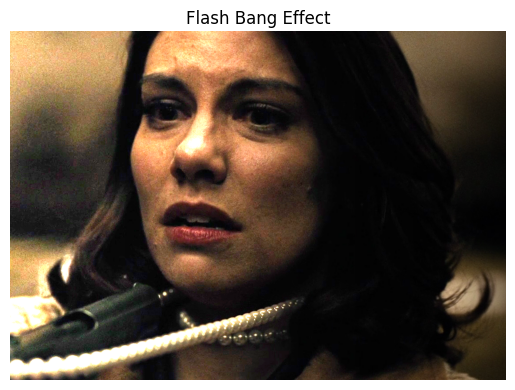

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('Q1I1.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

rows, cols, _ = img1.shape
gradient = np.tile(np.linspace(5, 0.7, cols), (rows, 1))
mask = np.dstack([gradient]*3)

flash_img = np.clip(img1 * mask, 0, 255).astype(np.uint8)

plt.imshow(flash_img)
plt.title('Flash Bang Effect')
plt.axis('off')
plt.show()

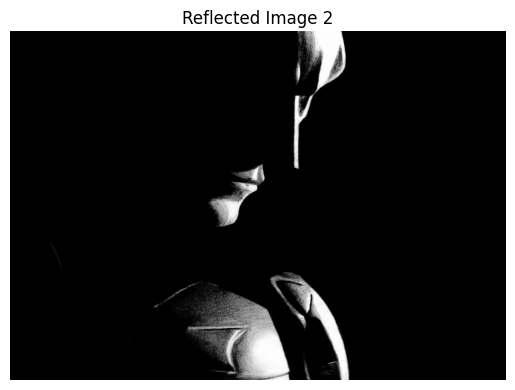

In [3]:
img2 = cv2.imread('Q1I2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2_resized = cv2.resize(img2, (cols, rows))

img2_flipped = cv2.flip(img2_resized, 1)

plt.imshow(img2_flipped)
plt.title('Reflected Image 2')
plt.axis('off')
plt.show()

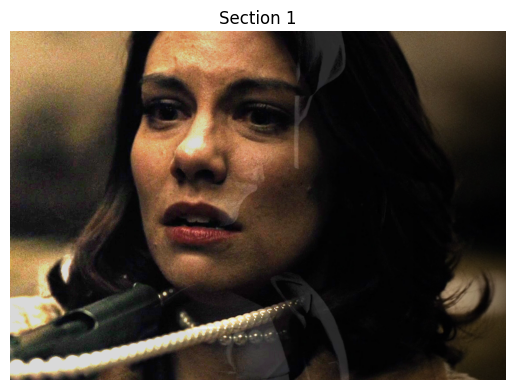

In [4]:
alpha = 0.85
final_output = cv2.addWeighted(flash_img, alpha,img2_flipped, 1 - alpha, 0)

plt.imshow(final_output)
plt.title('Section 1')
plt.axis('off')
plt.show()

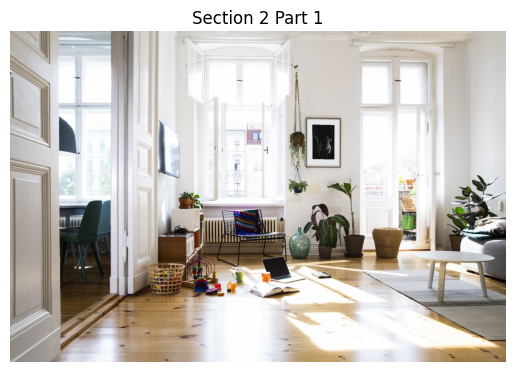

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('Q2I1.jpg')
dst_frame = cv2.imread('Q2I2.jpg')

W, H = 300, 200
src = cv2.resize(src, (W, H))

src_pts = np.float32([
    [0, 0],
    [W, 0],
    [0, H]
])

dst_pts = np.float32([
    [1219, 377],
    [1307, 379],
    [1220, 515]
])

affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)

rows, cols, _ = dst_frame.shape
warped_img = cv2.warpAffine(src, affine_matrix, (cols, rows))

combined = dst_frame.copy()
mask = warped_img > 0
combined[mask] = warped_img[mask]

plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Section 2 Part 1')
plt.axis('off')
plt.show()

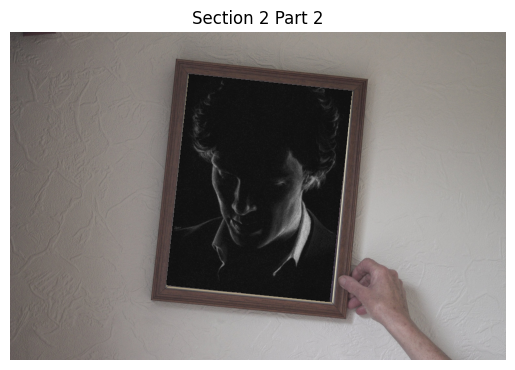

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('Q2I1.jpg')
dst_frame = cv2.imread('Q2I3.jpg')

W, H = 300, 400
src = cv2.resize(src, (W, H))

src_pts = np.float32([
    [0, 0],
    [W, 0],
    [0, H]
])

dst_pts = np.float32([
    [370, 89],
    [706, 124],
    [323, 523]
])

affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)

rows, cols, _ = dst_frame.shape
warped_img = cv2.warpAffine(src, affine_matrix, (cols, rows))

combined = dst_frame.copy()
mask = (warped_img > 0)
combined[mask] = warped_img[mask]

plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Section 2 Part 2')
plt.axis('off')
plt.show()

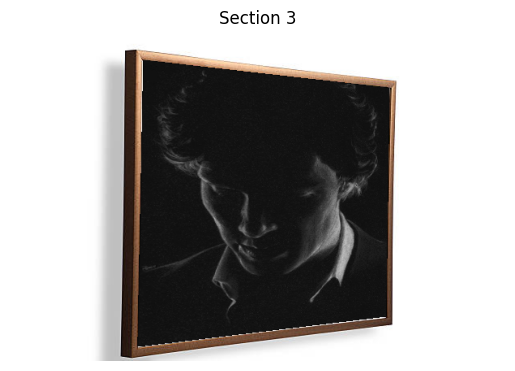

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('Q2I1.jpg')
dst_frame = cv2.imread('Q3I1.jpg')

W, H = 300, 400
src = cv2.resize(src, (W, H))

src_pts = np.float32([
    [0, 0],
    [W, 0],
    [0, H],
    [W, H]
])

dst_pts = np.float32([
    [165, 36],
    [468, 70],
    [158, 388],
    [464, 351]
])

perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

rows, cols, _ = dst_frame.shape
warped_img = cv2.warpPerspective(src, perspective_matrix, (cols, rows))

combined = dst_frame.copy()
mask = (warped_img > 0)
combined[mask] = warped_img[mask]

plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Section 3')
plt.axis('off')
plt.show()